**Name:** Shashwat Baral  
**Course:** MSCS-634-B01 - Advanced Big Data and Data Mining (Summer 2025)  
**Lab:** Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis Using Python  


In [6]:
from google.colab import files
uploaded = files.upload()


Saving mobile phone usage .csv to mobile phone usage  (2).csv


In [7]:
import pandas as pd

# Load the dataset
# Reload the CSV with proper encoding to remove BOM
df = pd.read_csv('mobile phone usage .csv', encoding='utf-8-sig')
df.head()



,ï»¿name,slug,value,date_of_information,ranking,region
0,China,china,"1,810,000,000",2023,1,East and Southeast Asia
1,India,india,"1,140,000,000",2022,2,South Asia
2,United States,united-states,"386,000,000",2023,3,North America
3,Indonesia,indonesia,"352,000,000",2023,4,East and Southeast Asia
4,Russia,russia,"245,000,000",2022,5,Central Asia


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ï»¿name              225 non-null    object
 1   slug                 225 non-null    object
 2   value                225 non-null    object
 3   date_of_information  225 non-null    int64 
 4   ranking              225 non-null    int64 
 5   region               225 non-null    object
dtypes: int64(2), object(4)
memory usage: 10.7+ KB


In [9]:
df.isnull().sum()


,0
ï»¿name,0
slug,0
value,0
date_of_information,0
ranking,0
region,0


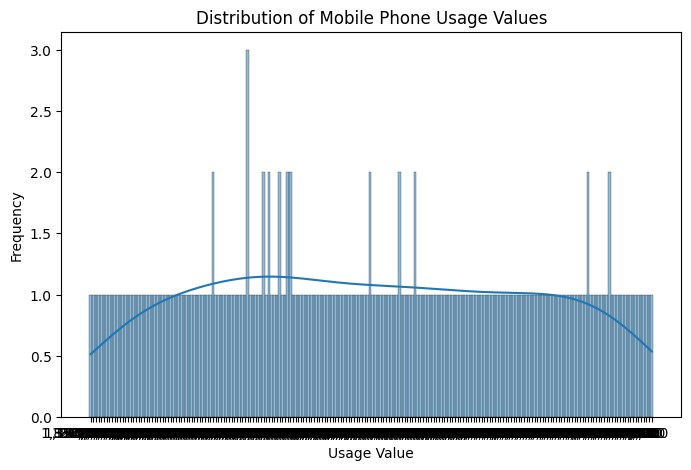

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['value'], bins=20, kde=True)
plt.title("Distribution of Mobile Phone Usage Values")
plt.xlabel("Usage Value")
plt.ylabel("Frequency")
plt.show()


In [12]:
print(df.columns)


Index(['ï»¿name', 'slug', 'value', 'date_of_information', 'ranking', 'region'], dtype='object')


In [14]:
df.rename(columns={'ï»¿name': 'name'}, inplace=True)


/tmp/ipython-input-15-2966350980.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='value', y='name', palette='viridis')


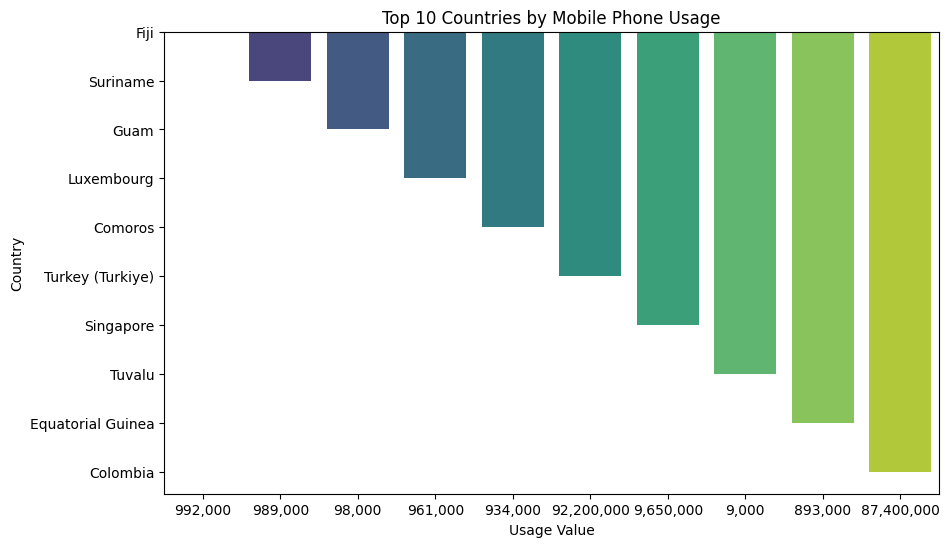

In [15]:
top10 = df.sort_values(by='value', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='value', y='name', palette='viridis')
plt.title("Top 10 Countries by Mobile Phone Usage")
plt.xlabel("Usage Value")
plt.ylabel("Country")
plt.show()


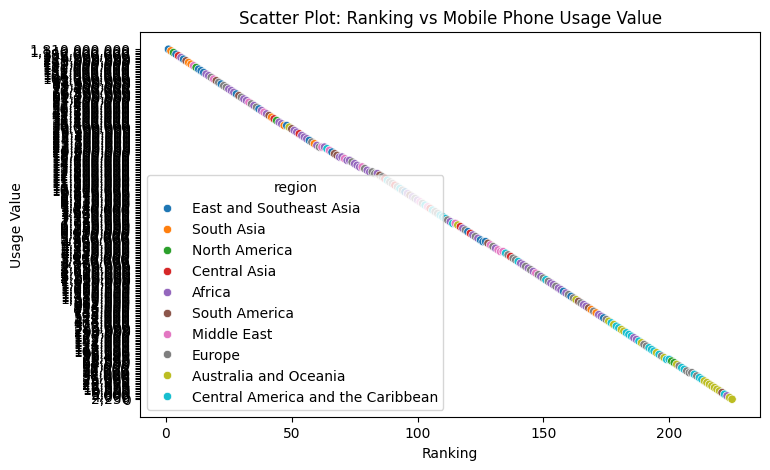

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='ranking', y='value', hue='region')
plt.title("Scatter Plot: Ranking vs Mobile Phone Usage Value")
plt.xlabel("Ranking")
plt.ylabel("Usage Value")
plt.show()


In [18]:
# Remove commas and convert 'value' column to numeric
df['value'] = df['value'].str.replace(',', '')
df['value'] = pd.to_numeric(df['value'], errors='coerce')


In [20]:
# Drop rows where region is missing
df = df.dropna(subset=['region'])

# Convert date column to datetime
df['date_of_information'] = pd.to_datetime(df['date_of_information'], errors='coerce')


In [21]:
df.describe()


,value,date_of_information,ranking
count,2.250000e+02,225,225.000000
mean,3.911035e+07,1970-01-01 00:00:00.000002022,113.000000
min,0.000000e+00,1970-01-01 00:00:00.000002004,1.000000
25%,7.520000e+05,1970-01-01 00:00:00.000002022,57.000000
50%,7.050000e+06,1970-01-01 00:00:00.000002023,113.000000
75%,2.380000e+07,1970-01-01 00:00:00.000002023,169.000000
max,1.810000e+09,1970-01-01 00:00:00.000002023,225.000000
std,1.498258e+08,NaN,65.096083


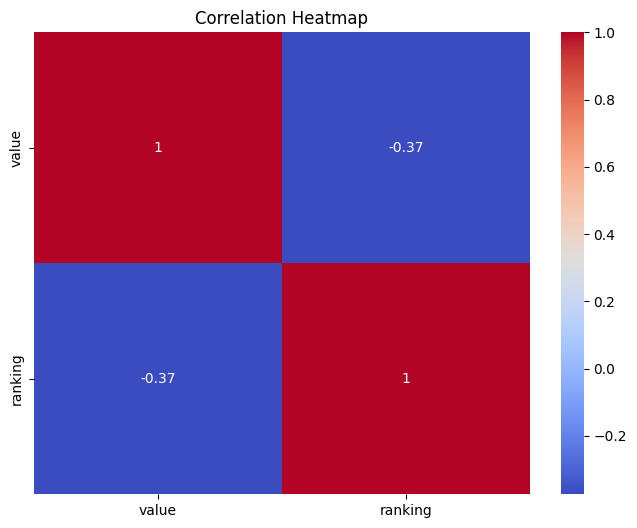

In [23]:
# Select only numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Assuming df is your cleaned DataFrame (after loading and handling missing data)
# For example, if not done yet:
# df['value'] = df['value'].str.replace(',', '').astype(float)
# df = df.dropna(subset=['region'])
# df['value'] = df['value'].fillna(df['value'].median())

# Step 2: Outlier removal
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['value'] < (Q1 - 1.5 * IQR)) | (df['value'] > (Q3 + 1.5 * IQR))]
df_no_outliers = df[~df.index.isin(outliers.index)]

# Step 3: Sampling 80% of data from df_no_outliers
df_sampled = df_no_outliers.sample(frac=0.8, random_state=42)

# Step 4: Min-Max scaling on sampled data
scaler = MinMaxScaler()
df_sampled['value_scaled'] = scaler.fit_transform(df_sampled[['value']])

df_sampled.head()


,name,slug,value,date_of_information,ranking,region,value_scaled
168,Bhutan,bhutan,752000,1970-01-01 00:00:00.000002023,169,South Asia,0.013413
46,Sri Lanka,sri-lanka,30000000,1970-01-01 00:00:00.000002023,47,South Asia,0.536654
185,Seychelles,seychelles,165000,1970-01-01 00:00:00.000002023,186,Africa,0.002912
126,Laos,laos,4820000,1970-01-01 00:00:00.000002021,127,East and Southeast Asia,0.086189
98,Serbia,serbia,8530000,1970-01-01 00:00:00.000002023,99,Europe,0.152560


In [32]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 168 to 200
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 156 non-null    object        
 1   slug                 156 non-null    object        
 2   value                156 non-null    int64         
 3   date_of_information  156 non-null    datetime64[ns]
 4   ranking              156 non-null    int64         
 5   region               156 non-null    object        
 6   value_scaled         156 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 9.8+ KB


In [33]:
df_sampled.describe()

,value,date_of_information,ranking,value_scaled
count,1.560000e+02,156,156.000000,156.000000
mean,1.042792e+07,1970-01-01 00:00:00.000002021,125.884615,0.186513
min,2.250000e+03,1970-01-01 00:00:00.000002004,31.000000,0.000000
25%,5.252500e+05,1970-01-01 00:00:00.000002021,74.750000,0.009356
50%,4.830000e+06,1970-01-01 00:00:00.000002023,125.500000,0.086368
75%,1.435000e+07,1970-01-01 00:00:00.000002023,174.250000,0.256678
max,5.590000e+07,1970-01-01 00:00:00.000002023,224.000000,1.000000
std,1.363886e+07,NaN,56.467171,0.243997


In [34]:
print("Min:", df_sampled['value'].min())
print("Max:", df_sampled['value'].max())
print("Mean:", df_sampled['value'].mean())
print("Median:", df_sampled['value'].median())
print("Mode:", df_sampled['value'].mode()[0])


Min: 2250
Max: 55900000
Mean: 10427915.596153846
Median: 4830000.0
Mode: 21200000


In [35]:
print("Range:", df_sampled['value'].max() - df_sampled['value'].min())
print("Q1:", df_sampled['value'].quantile(0.25))
print("Q3:", df_sampled['value'].quantile(0.75))
print("IQR:", Q3 - Q1)
print("Variance:", df_sampled['value'].var())
print("Std Deviation:", df_sampled['value'].std())


Range: 55897750
Q1: 525250.0
Q3: 14350000.0
IQR: 23048000.0
Variance: 186018521599776.38
Std Deviation: 13638860.714875579


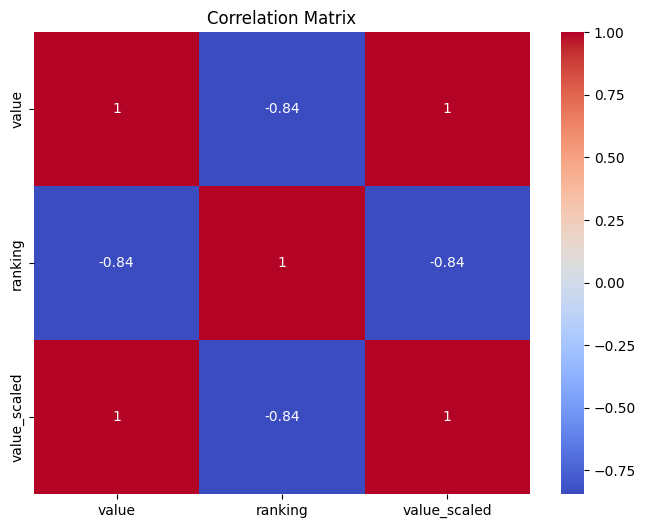

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(df_sampled.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
